In [16]:
import os

import argparse
import pandas as pd

from fragt2vec.utility import SELECTED_MD, get_format_time, find_nearest_neighbor, draw_multiple_mol, show_each_md, reduce_by_tsne

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

import rdkit
from rdkit.Chem.Draw import IPythonConsole
# IPythonConsole.ipython_useSVG = True
from IPython.display import SVG
from sklearn.decomposition import PCA

import rdkit.Chem as Chem
from rdkit.Chem import Draw

rdkit.__version__

'2019.03.3'

In [2]:
root_dir = '../../big_data/05_model_Tandem2vec/'
need_plot_md = ['nN', 'nS', 'nBondsD', 'naRing']

In [3]:
frag2info = pd.read_csv(os.path.join(root_dir, 'frag_smiles2md.csv'), index_col=0)
frag2info = frag2info.loc[:, need_plot_md]
frag2info.head(2)

,nN,nS,nBondsD,naRing
fragment,,,,
CC,0,0,0,0
C,0,0,0,0


### model trained by FastText

In [4]:
minn = 1
maxn = 2

frag_id2vec_file = 'frag_id2vec_minn_{}_maxn_{}.csv'.format(minn, maxn)
frag2vec_fp = os.path.join(root_dir, frag_id2vec_file)

In [5]:
frag2vec = pd.read_csv(frag2vec_fp, index_col='fragment')
x_reduced = reduce_by_tsne(frag2vec)
x_reduced = pd.DataFrame(data=x_reduced, index=frag2vec.index)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3056 samples in 0.061s...
[t-SNE] Computed neighbors for 3056 samples in 0.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3056
[t-SNE] Computed conditional probabilities for sample 2000 / 3056
[t-SNE] Computed conditional probabilities for sample 3000 / 3056
[t-SNE] Computed conditional probabilities for sample 3056 / 3056
[t-SNE] Mean sigma: 0.154747
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.356544
[t-SNE] KL divergence after 2000 iterations: 0.988398
(3056, 2)
t-SNE took 14.7s.


#### fig. 3-2, 3-3

  >Start to plot t-SNE vis of fragment vector...


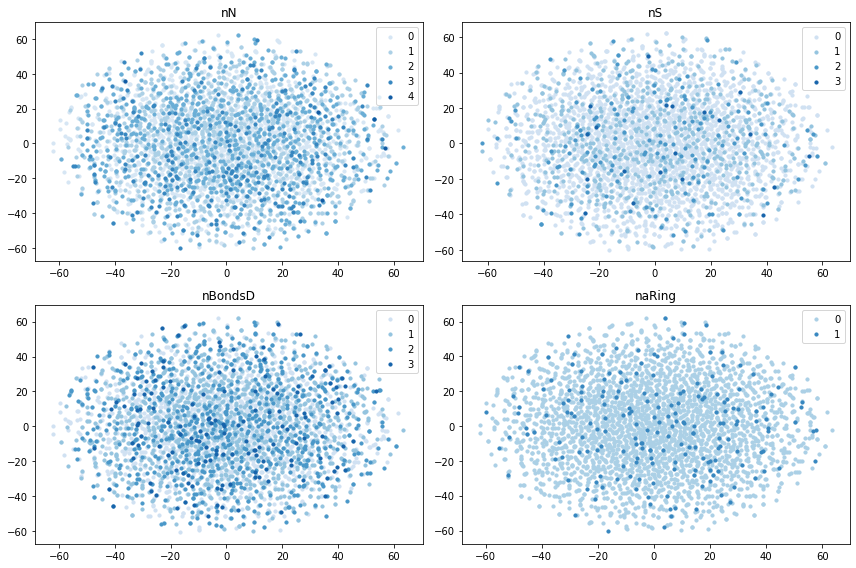

In [20]:
print('  >Start to plot t-SNE vis of fragment vector...')
save_fig_path = os.path.join('./chapter3_figure/', 't-SNE_vis_ws_{}_minn_{}_maxn_{}.png'.format(4, minn, maxn))
fig = show_each_md(x_reduced=x_reduced, frag_info=frag2info,
             file_path=save_fig_path)
fig.savefig(save_fig_path, dpi=200)

#### fragment similarity

In [21]:
q_frags = ["C1=COCO1" ,"C1=CCNN=C1" ,"C1=CCC1" ,"OBr", "S=S" ,"C1#CNCC1"]
[i in frag2vec.index for i in q_frags]

[True, True, True, True, True, True]

In [22]:
q_frag2vec = frag2vec.loc[q_frags, :].copy()

In [23]:
topn = 4
nn = find_nearest_neighbor(training_mol_vec_fp=frag2vec_fp, query_mol_vec_df=q_frag2vec, top_n=topn)

current line: 0


In [24]:
def save_fig(fig, file_path):
    with open(file_path, 'w') as f_handle:
        try:
            f_handle.write(fig)
        except TypeError:
            f_handle.write(fig.data)

In [25]:
smiles_list = []
dis = []
legends = []
for inx in range(len(q_frags)):
    smiles_list += [i.split(": ")[0] for i in nn[inx][q_frags[inx]].split('; ')]
    dis += [str('{:.8f}').format(float(i.split(": ")[1])) for i in nn[inx][q_frags[inx]].split('; ')]
    # print(dis)
    # print(inx, smiles_list)
legends += ['{}({})'.format(smiles_list[i],dis[i]) for i in range(len(smiles_list))]
fig = draw_multiple_mol(smiles_list=smiles_list, mols_per_row=topn, legends=legends)
save_fig(fig, file_path='./chapter3_figure/top{}_minn_{}_maxn_{}.svg'.format(topn, minn, maxn))

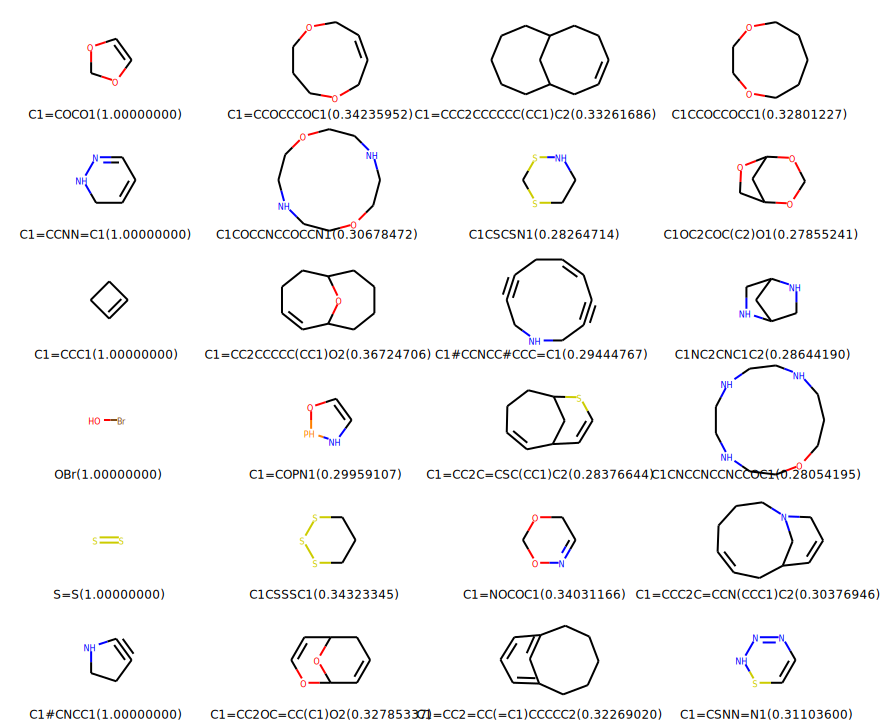

In [26]:
fig

### model trained by Word2vec (same as Mol2vec)

In [4]:
frag_id2vec_file = 'frag_id2vec_word2vec.csv'
frag2vec_fp = os.path.join(root_dir, frag_id2vec_file)

In [5]:
frag2vec = pd.read_csv(frag2vec_fp, index_col='fragment')
x_reduced = reduce_by_tsne(frag2vec)
x_reduced = pd.DataFrame(data=x_reduced, index=frag2vec.index)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3056 samples in 0.079s...
[t-SNE] Computed neighbors for 3056 samples in 0.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3056
[t-SNE] Computed conditional probabilities for sample 2000 / 3056
[t-SNE] Computed conditional probabilities for sample 3000 / 3056
[t-SNE] Computed conditional probabilities for sample 3056 / 3056
[t-SNE] Mean sigma: 0.255754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.534378
[t-SNE] KL divergence after 2000 iterations: 2.179487
(3056, 2)
t-SNE took 17.6s.


#### fig. 3-2, 3-3

  >Start to plot t-SNE vis of fragment vector...


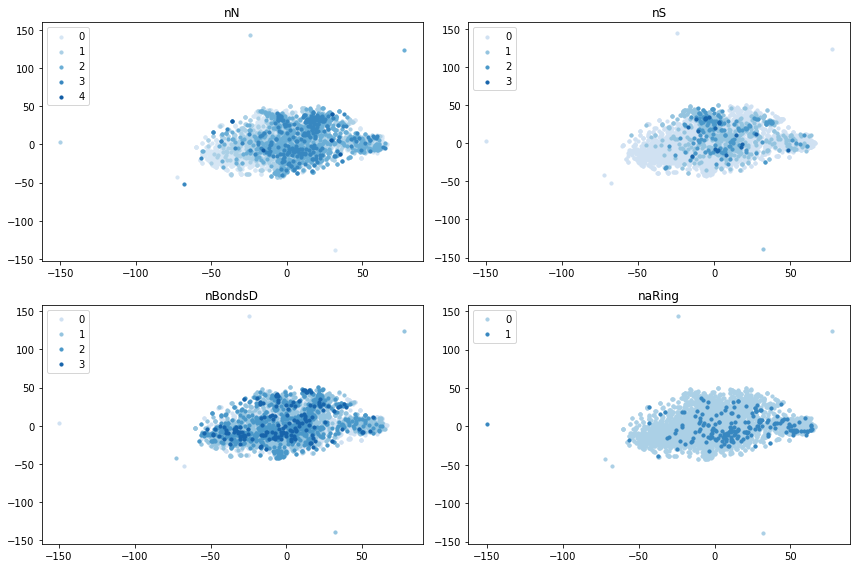

In [6]:
print('  >Start to plot t-SNE vis of fragment vector...')
save_fig_path = os.path.join('./chapter3_figure/', 't-SNE_vis_word2vec.png')
fig = show_each_md(x_reduced=x_reduced, frag_info=frag2info,
             file_path=save_fig_path)
fig.savefig(save_fig_path, dpi=200)

#### fragment similarity

In [7]:
q_frags = ["C1=COCO1" ,"C1=CCNN=C1" ,"C1=CCC1" ,"OBr", "S=S" ,"C1#CNCC1"]
[i in frag2vec.index for i in q_frags]

[True, True, True, True, True, True]

In [8]:
q_frag2vec = frag2vec.loc[q_frags, :].copy()

In [9]:
topn = 4
nn = find_nearest_neighbor(training_mol_vec_fp=frag2vec_fp, query_mol_vec_df=q_frag2vec, top_n=topn)

current line: 0


In [10]:
def save_fig(fig, file_path):
    with open(file_path, 'w') as f_handle:
        try:
            f_handle.write(fig)
        except TypeError:
            f_handle.write(fig.data)

In [12]:
smiles_list = []
dis = []
legends = []
for inx in range(len(q_frags)):
    smiles_list += [i.split(": ")[0] for i in nn[inx][q_frags[inx]].split('; ')]
    dis += [str('{:.8f}').format(float(i.split(": ")[1])) for i in nn[inx][q_frags[inx]].split('; ')]
    # print(dis)
    # print(inx, smiles_list)
legends += ['{}({})'.format(smiles_list[i],dis[i]) for i in range(len(smiles_list))]
fig = draw_multiple_mol(smiles_list=smiles_list, mols_per_row=topn, legends=legends)
save_fig(fig, file_path='./chapter3_figure/top{}_word2vec.svg'.format(topn))

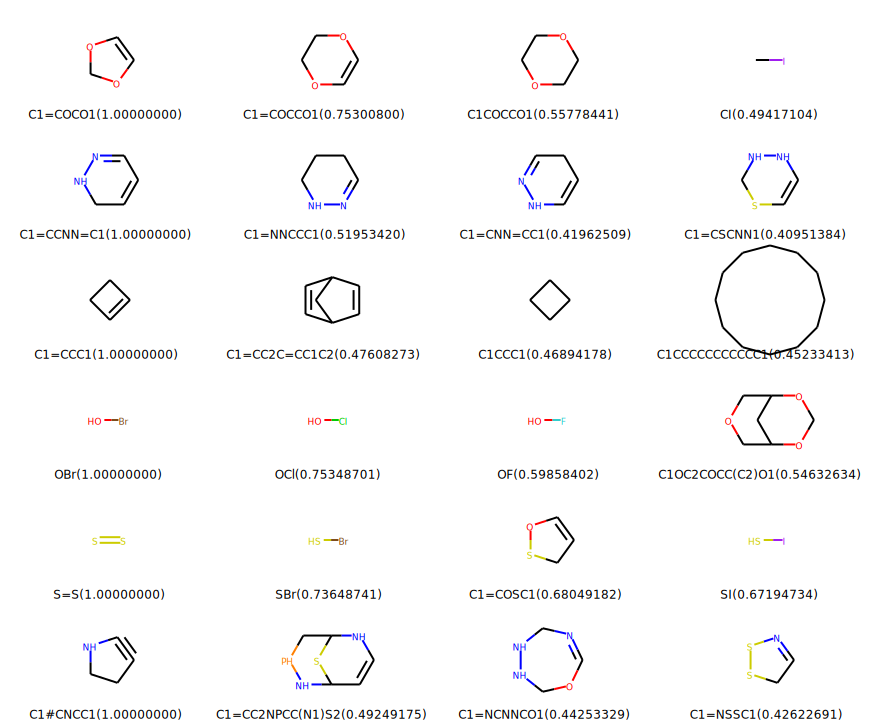

In [13]:
fig

### Analogical similarity of fragment vectors

In [20]:
minn = 1
maxn = 2

frag_id2vec_file = 'frag_id2vec_minn_{}_maxn_{}.csv'.format(minn, maxn)
frag2vec_fp = os.path.join(root_dir, frag_id2vec_file)
print(frag2vec_fp)

frag2vec = pd.read_csv(frag2vec_fp, index_col='fragment')
frag2vec.head(2)

../../big_data/05_model_Tandem2vec/frag_id2vec_minn_1_maxn_2.csv


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
fragment,,,,,,,,,,,,,,,,,,,,,
CC,0.480952,1.488302,1.169265,-0.693389,0.845229,0.412012,0.701256,-0.133183,-0.165926,0.094339,...,-0.254592,0.315663,0.580485,0.000645,0.073145,-0.317370,0.069709,-0.774675,-0.081370,-0.185646
C,0.401933,1.147575,0.894457,-0.527708,0.685741,0.312301,0.526161,-0.104037,-0.141404,0.061230,...,-0.228260,0.337185,0.565867,-0.044333,0.091869,-0.290008,0.081442,-0.748831,-0.105687,-0.158385


In [21]:
pca = PCA(n_components=2)

In [22]:
x_reduced_pca = pd.DataFrame(data=pca.fit_transform(frag2vec), index=frag2vec.index)
x_reduced_pca.head(2)

,0,1
fragment,,
CC,-1.675848,0.799215
C,-1.112195,0.383096


In [56]:
frag_pairs = pd.read_csv(os.path.join(root_dir, 'bond_pairs.txt'), sep='\t')
# frag_pairs2 = pd.read_csv(os.path.join(root_dir, 'bond_pair_aromatic_ring.txt'), sep='\t')
# frag_pairs = pd.concat([frag_pairs1, frag_pairs2], axis=0)
frag_pairs = frag_pairs.loc[frag_pairs['keep']==1]
print(frag_pairs.shape)
frag_pairs.head(2)

(57, 4)


,frag1,frag2,bond_type,keep
0,C=O,CO,double_bond,1.0
1,C=C,CC,double_bond,1.0


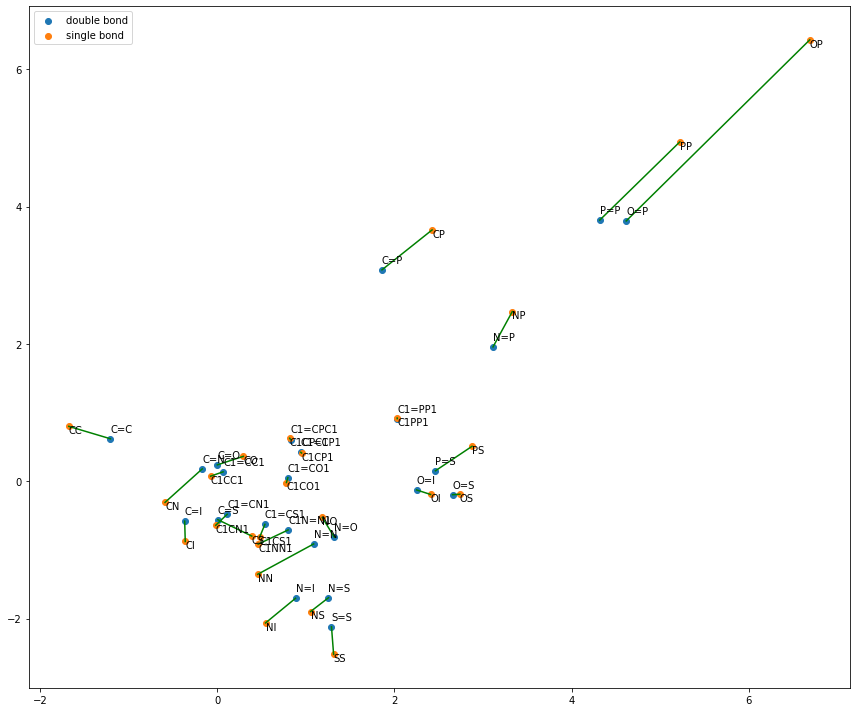

In [65]:
plt.figure(figsize=(12, 10))
for bond_type in frag_pairs['bond_type'].unique()[0:1]:
    current_frag1 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag1']
    current_frag2 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag2']
    frag1_vec = x_reduced_pca.loc[current_frag1, :]
    frag2_vec = x_reduced_pca.loc[current_frag2, :]
    plt.scatter(frag1_vec[0], frag1_vec[1], label='double bond')
    plt.scatter(frag2_vec[0], frag2_vec[1], label='single bond')
    for i in range(frag1_vec.shape[0]):
#         print(frag1_vec.loc[i,:].index)
        plt.text(frag1_vec.iloc[i, 0], frag1_vec.iloc[i, 1]+0.1, frag1_vec.iloc[i,:].name)
        plt.text(frag2_vec.iloc[i, 0], frag2_vec.iloc[i, 1]-0.1, frag2_vec.iloc[i,:].name)
        plt.plot([frag1_vec.iloc[i, 0], frag2_vec.iloc[i, 0]], [frag1_vec.iloc[i, 1], frag2_vec.iloc[i, 1]], c='g')
plt.legend()
plt.tight_layout()
plt.savefig('./chapter3_figure/single_double_bond_pairs.png', dpi=200)
plt.show()

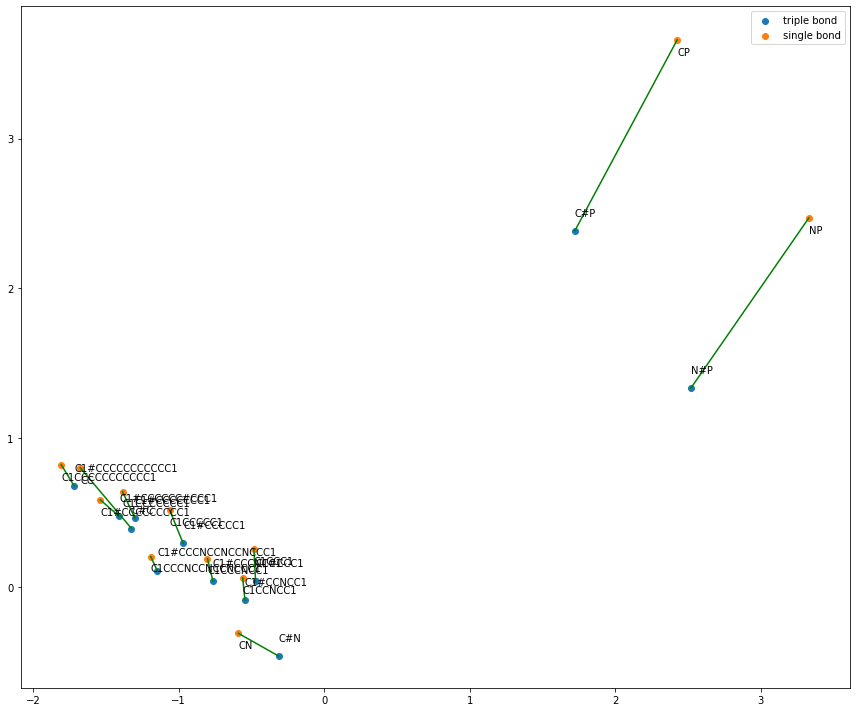

In [66]:
plt.figure(figsize=(12, 10))
for bond_type in frag_pairs['bond_type'].unique()[1:2]:
    current_frag1 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag1']
    current_frag2 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag2']
    frag1_vec = x_reduced_pca.loc[current_frag1, :]
    frag2_vec = x_reduced_pca.loc[current_frag2, :]
    plt.scatter(frag1_vec[0], frag1_vec[1], label='triple bond')
    plt.scatter(frag2_vec[0], frag2_vec[1], label='single bond')
    for i in range(frag1_vec.shape[0]):
#         print(frag1_vec.loc[i,:].index)
        plt.text(frag1_vec.iloc[i, 0], frag1_vec.iloc[i, 1]+0.1, frag1_vec.iloc[i,:].name)
        plt.text(frag2_vec.iloc[i, 0], frag2_vec.iloc[i, 1]-0.1, frag2_vec.iloc[i,:].name)
        plt.plot([frag1_vec.iloc[i, 0], frag2_vec.iloc[i, 0]], [frag1_vec.iloc[i, 1], frag2_vec.iloc[i, 1]], c='g')
plt.legend()
plt.tight_layout()
plt.savefig('./chapter3_figure/triple_single_bond_pairs.png', dpi=200)
plt.show()

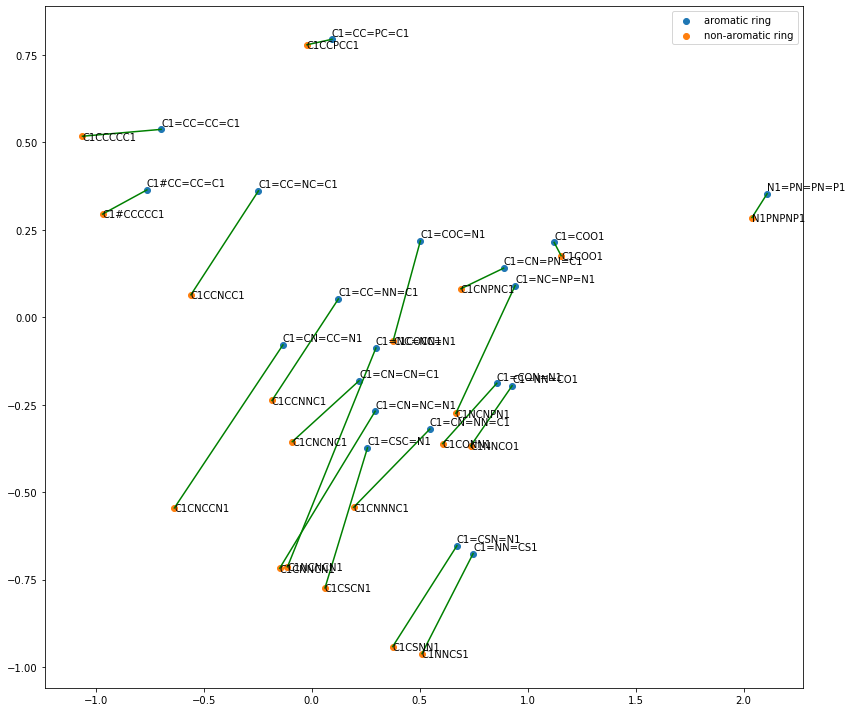

In [67]:
plt.figure(figsize=(12, 10))
for bond_type in frag_pairs['bond_type'].unique()[2:3]:
    current_frag1 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag1']
    current_frag2 = frag_pairs.loc[frag_pairs1['bond_type']==bond_type, 'frag2']
    frag1_vec = x_reduced_pca.loc[current_frag1, :]
    frag2_vec = x_reduced_pca.loc[current_frag2, :]
    plt.scatter(frag1_vec[0], frag1_vec[1], label='aromatic ring')
    plt.scatter(frag2_vec[0], frag2_vec[1], label='non-aromatic ring')
    for i in range(frag1_vec.shape[0]):
#         print(frag1_vec.loc[i,:].index)
        plt.text(frag1_vec.iloc[i, 0], frag1_vec.iloc[i, 1]+0.01, frag1_vec.iloc[i,:].name)
        plt.text(frag2_vec.iloc[i, 0], frag2_vec.iloc[i, 1]-0.01, frag2_vec.iloc[i,:].name)
        plt.plot([frag1_vec.iloc[i, 0], frag2_vec.iloc[i, 0]], [frag1_vec.iloc[i, 1], frag2_vec.iloc[i, 1]], c='g')
plt.legend()
plt.tight_layout()
plt.savefig('./chapter3_figure/aromatic_ring_non_aromatic_ring.png', dpi=200)
plt.show()